# Tutorial-02 Intro to longitudinal PID control

PID control is composed of the results of three error adjustment methods (proportional, integral, derivative), where the proportional part considers the size of the error and tries to reduce it; the integral part considers the accumulation of error and strives to eliminate steady-state error; the derivative part considers the rate of change of the error and tries to reduce the change in error.
$$
u = K_P \times e(t) + K_I \times \int_0^t e(\tau) \text{d}\tau + K_D \dot{e}(t)
$$

In practical programming, it is difficult for us to implement continuous-time integration and differentiation with code, and we do not know the mathematical expression of the error, making it difficult to obtain the analytical solution of the above equation. Therefore, it is necessary to discretize the integral and derivative:
$$
\begin{align}
&K_p \times e(t) = K_p \times e_k \\
&\int_0^t e(t) \text{d}t = \sum_{i=0}^k e_i \\
&\dot{e}(t) = \frac{e_k - e_{k-1}}{\text{d}t}
\end{align}
$$
The complete formula is:
$$
u = K_P e_k + K_I \sum_{i=0}^k e_i + K_D \frac{e_k - e_{k-1}}{\text{d}t}
$$

In [ ]:
class PidController:
    Kp_ = 0 # Proportion Gain
    Ki_ = 0 # Integral Gain
    Kd_ = 0 # Derivative Gain
    
    previous_error_ = 0 # Control error on last iteration
    accum_error_    = 0 # Accumulate erro
    
    def __init__(self, Kp, Ki, Kd):
        self.Kp_ = Kp # Initialize proportion gain
        self.Ki_ = Ki # Initialize integration gain
        self.Kd_ = Kd # Initialize derivative gain
        
    def update_control(self, target_state, current_state, dt):
        output = 0
        
        # Calculate control error
        # TODO
        
        # Carculate accumulate error and integral term
        # TODO
        
        # Calculate derivative term
        # TODO
        
        # Calculate control output
        # TODO
        
        # Update control error
        # TODO
            
        return output

Assume that the relationship between the vehicle's throttle/brake command $u(t)$ and vehicle speed $v(t)$ complies with the first-order inertia system (here, let $u(t)>0$ represent throttle and $u(t)<0$ represent brake):
$$
\dot{v}(t) = \frac{1}{\Gamma} \cdot (u(t) - v(t))
$$
As with PID, we need to discretize the above expression:
$$
\begin{align}
\dot{v}(t) &= \frac{v_{k+1} - v_{k}}{\text{d}t} \\
\Rightarrow v_{k + 1} &= v_{k} + \dot{v}(t) \text{d}t \\
&= v_{k} + \frac{1}{\Gamma}(u_k - v_k) \cdot \text{d}t
\end{align}
$$

In [153]:
class Vehicle:
    tau_ = 1 # Parameter for 1st-order system
    v_   = 0 # Current velocity
    
    def __init__(self, initial_state):
        self.v_ = initial_state # Initialize current velocity
    
    def update_state(self, u, dt):
        # Compelte the 1st-order system
        # TODO
        return self.v_ 

Next, we can test the PID controller we just created using this simple vehicle model.

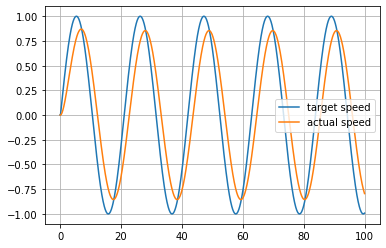

In [154]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Initialize vehicle
initial_v = 0
vehicle = Vehicle(initial_v) 

# Initialize pid controller
pid = PidController(Kp=0.5, Ki=0.05, Kd=0.001)

# Set up simulation parameters
total_sim_time = 100
sample_time    = 0.1
sim_time       = np.arange(0, total_sim_time, sample_time)

target_v_list = np.zeros(len(sim_time) + 1)
actual_v_list = np.ones (len(sim_time) + 1) * initial_v
control_list  = np.zeros(len(sim_time)    )

# Start simulation
current_v = vehicle.v_
for i in range(len(sim_time)):
    t = sim_time[i]
    target_v = math.sin(0.3 * t)
    
    accel_cmd = pid.update_control(target_v, current_v, sample_time)
    current_v = vehicle.update_state(accel_cmd, sample_time)
    
    target_v_list[i + 1] = target_v
    actual_v_list[i + 1] = current_v
    control_list[i] = accel_cmd
    
# Plot result
plt.figure(1)
sim_time_extend = np.append(sim_time, total_sim_time)
plt.plot(sim_time_extend, target_v_list, label='target speed')
plt.plot(sim_time_extend, actual_v_list, label='actual speed')
plt.grid(True)
plt.axis('tight')
plt.box(True)  
plt.legend()